# The weird things that happen in high dimension space

## Imports etc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import scipy

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib as mpl

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
np.set_printoptions(linewidth=1000)

mpl.rcParams.update({
    "figure.dpi": 200,                    
    "font.size": 10,
    # Ticks
    "ytick.right": True,
    "ytick.direction": "in",
    "ytick.minor.visible": False,
    "xtick.top": True,
    "xtick.direction": "in",
    "xtick.minor.visible": False,
    "lines.linewidth" : 0.8,
    "lines.markersize" : 3,
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Most of the volume is at the edge

In [ ]:
box_size = 1
edge_frac = 0.1

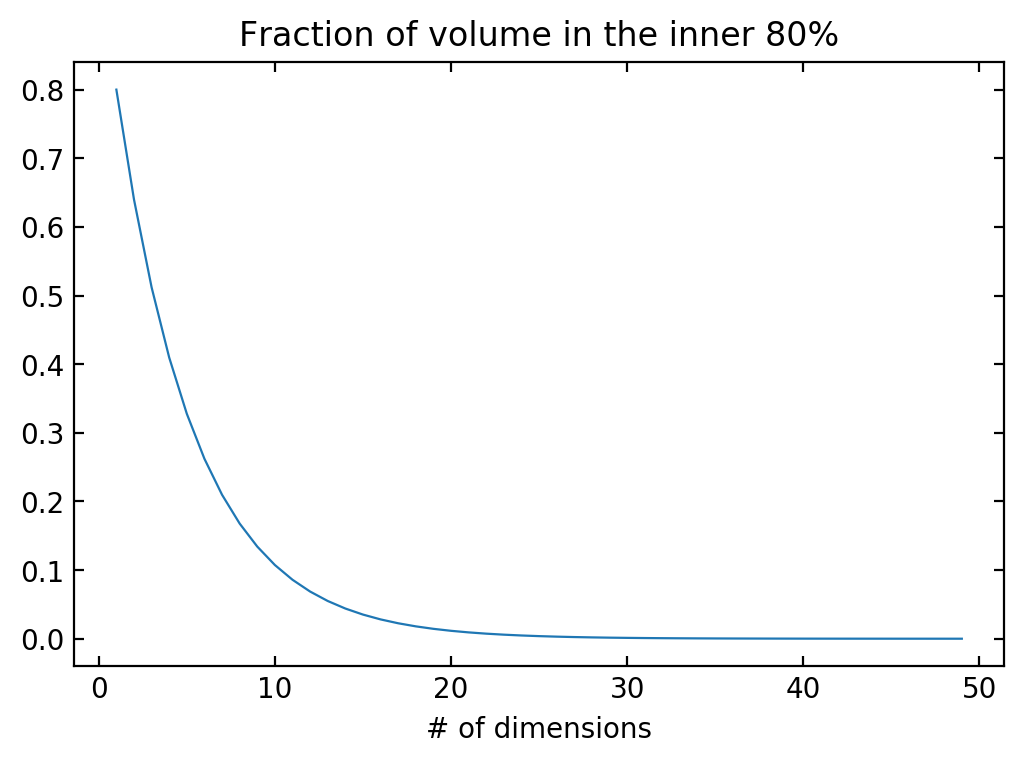

In [8]:
inner_box_size = box_size - box_size*edge_frac*2

dims = np.arange(1, 50)

_, ax = plt.subplots()
ax.plot(dims, inner_box_size**dims / box_size**dims)
ax.set(
    title="Fraction of volume in the inner {:.0f}%".format(inner_box_size*100),
    xlabel="# of dimensions",
);

We can actually be stronger than this! If we think of an edge as a corner of order 1, a corner of a 2d shape as an order 2 corner etc We can ask what fraction of points are at a corner of at least some order.

More than 50% chance that we are in at least a 9th degree corner! (on 9 edges)


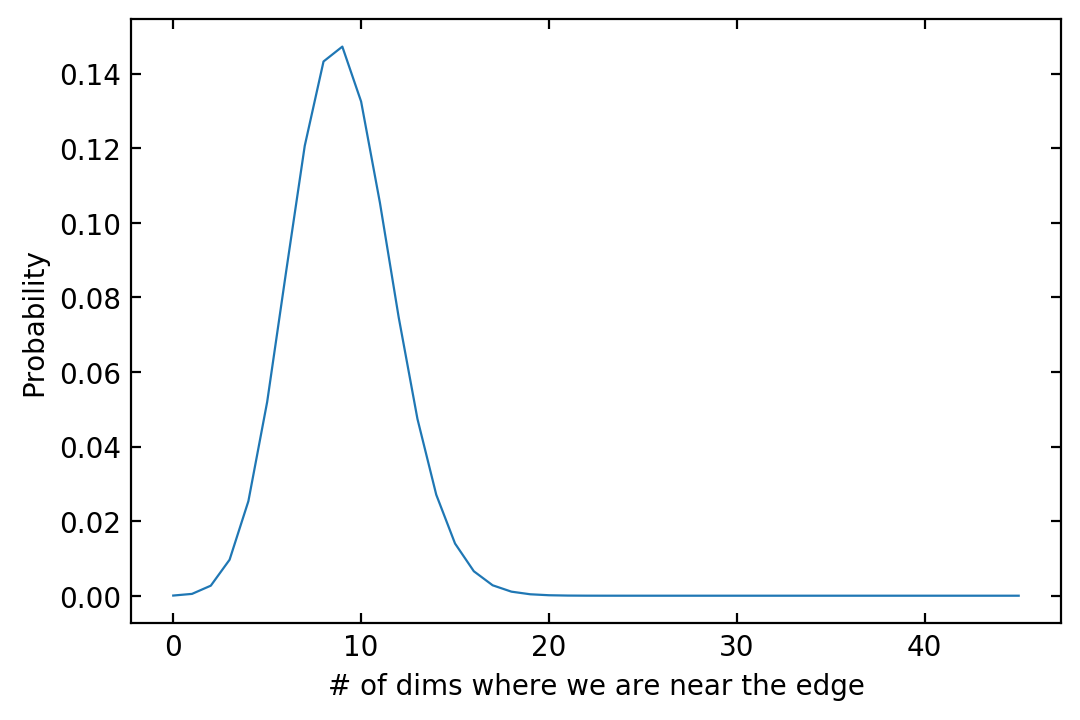

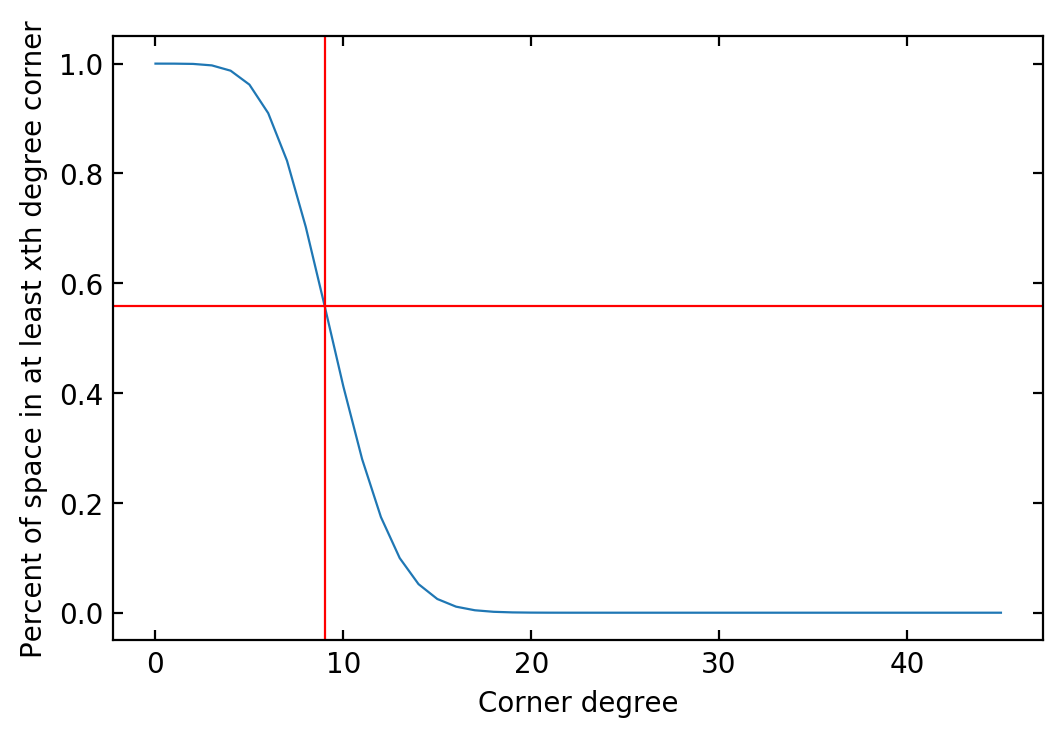

In [35]:
dims = 45
inner_frac = 0.8
outer_frac = 0.2

# What is the probability of k of the dimensions being in the outer frac?
# This is explained by the binomial coefficient
# We do 50 flips with 0.2 chance of success (outer), 0.8 chance of failure (inner)

k = np.arange(dims+1)
p = scipy.special.binom(dims, k) * inner_frac**(dims - k) * outer_frac**k

_, ax = plt.subplots()
ax.plot(k, p)
ax.set(
    xlabel="# of dims where we are near the edge",
    ylabel="Probability",
)


_, ax = plt.subplots()
p_in_xth_deg_corner = np.cumsum(p[::-1])[::-1] # This works I promise!
ax.plot(k, p_in_xth_deg_corner)
ax.set(
    xlabel="Corner degree",
    ylabel="Percent of space in at least xth degree corner",
)
ax.axhline(p_in_xth_deg_corner[9], color="r")
ax.axvline(k[9], color="r")
print("More than 50% chance that we are in at least a 9th degree corner! (on 9 edges)")

# Volume and surface area of hypersphere

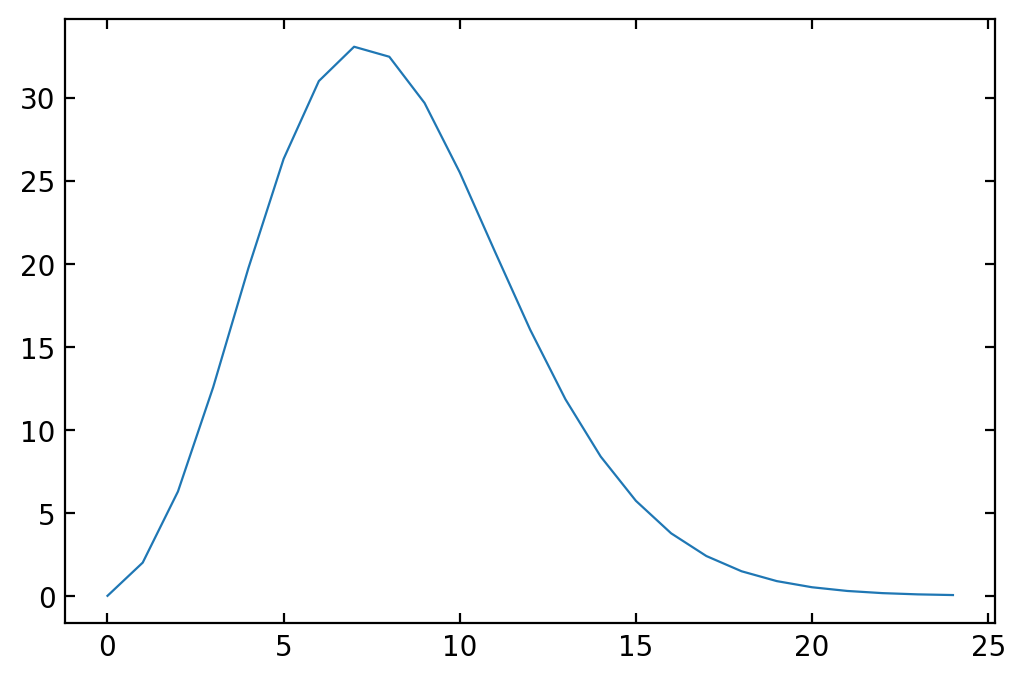

In [53]:
# From http://mathworld.wolfram.com/Hypersphere.html

def hyper_area(dims):
    return 2*np.pi**(dims/2) / scipy.special.gamma(dims/2)
   
dims = np.arange(25)
    
_, ax = plt.subplots()
ax.plot(dims, area(dims))

As a result most of the probability mass in a high dimensional pdf is not at the mode!

In [29]:
g = norm(loc=0, scale=1)
x = np.linspace(0, 10, 10000)
y = g.pdf(x)

dims = np.arange(25)

for d in dims:
    mg = multivariate_normal(mean = np.zeros(d), cov = np.diag(np.ones(d)))
    
    locs = np.zeros((len(x), d))
    locs[:,-1] = x
    
    density_at_r = mg.pdf(locs)
    
    area_at_r = np.pi*
    

np.trapz(y, x)

SyntaxError: invalid syntax (<ipython-input-29-64c87191ce77>, line 7)

In [46]:
mg = multivariate_normal(mean = np.zeros(2), cov = np.diag(np.ones(2)))
mg.pdf(np.array([[0, 0], [0, 1]]))

array([0.15915494, 0.09653235])